### For testing ORACLE on large batches of ELAsTiCC test sample data through the parquet files on NERSC

In [1]:
# ls /global/cfs/cdirs/desc-td/ELASTICC2/ | sed 's/ELASTICC2_FINAL_//' | xargs -IXXX -P32 python3 ../../../fits_to_parquet.py /global/cfs/cdirs/desc-td/ELASTICC2/ELASTICC2_FINAL_XXX parquet/XXX.parquet/
import polars as pl
import pandas as pd
parquet_path = "/global/cfs/cdirs/desc-td/ELASTICC2_parquet"

In [2]:
from LSST_Source import LSST_Source
from dataloader import LSSTSourceDataSet

2025-06-24 14:54:37.812251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Example 1: SNID - 1000168 (Class = SNII)

In [22]:
# finds which of Rob's parquet files could potentially contain the object
import os
class_name = "SNIb"
snid = 1009447
parquet_paths = os.listdir(parquet_path)
class_paths = [path for path in parquet_paths if class_name in path]
class_paths

['SNIb-Templates.parquet', 'SL-SNIb.parquet', 'SNIb+HostXT_V19.parquet']

In [4]:
# read those parquet files into memory
parquets = []
for path in class_paths:
    parquets.append(pl.read_parquet(os.path.join(parquet_path, path)))

parquets[0].head()

SNID,MJD,BAND,PHOTFLAG,PHOTPROB,FLUXCAL,FLUXCALERR,PSF_SIG1,SKY_SIG,RDNOISE,ZEROPT,ZEROPT_ERR,GAIN,SIM_MAGOBS,RA,DEC,SNTYPE,NOBS,PTROBS_MIN,PTROBS_MAX,MWEBV,MWEBV_ERR,REDSHIFT_HELIO,REDSHIFT_HELIO_ERR,REDSHIFT_FINAL,REDSHIFT_FINAL_ERR,VPEC,VPEC_ERR,HOSTGAL_NMATCH,HOSTGAL_NMATCH2,HOSTGAL_OBJID,HOSTGAL_FLAG,HOSTGAL_PHOTOZ,HOSTGAL_PHOTOZ_ERR,HOSTGAL_SPECZ,HOSTGAL_SPECZ_ERR,HOSTGAL_RA,…,SIM_HOSTLIB(LOG_SFR),SIM_DLMU,SIM_LENSDMU,SIM_RA,SIM_DEC,SIM_MWEBV,SIM_PEAKMJD,SIM_MJD_EXPLODE,SIM_MAGSMEAR_COH,SIM_AV,SIM_RV,SIM_SALT2x0,SIM_SALT2x1,SIM_SALT2c,SIM_SALT2mB,SIM_SALT2alpha,SIM_SALT2beta,SIM_SALT2gammaDM,SIM_PEAKMAG_u,SIM_PEAKMAG_g,SIM_PEAKMAG_r,SIM_PEAKMAG_i,SIM_PEAKMAG_z,SIM_PEAKMAG_Y,SIM_EXPOSURE_u,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_EXPOSURE_i,SIM_EXPOSURE_z,SIM_EXPOSURE_Y,SIM_GALFRAC_u,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_GALFRAC_Y,SIM_SUBSAMPLE_INDEX
i64,list[f64],list[str],list[i32],list[f32],list[f32],list[f32],list[f32],list[f32],list[f32],list[f32],list[f32],list[f32],list[f32],f64,f64,i32,i32,i32,i32,f32,f32,f32,f32,f32,f32,f32,f32,i16,i16,i64,i16,f32,f32,f32,f32,f64,…,f32,f32,f32,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i16
1000065,"[61194.4149, 61194.4248, … 61786.0539]","[""Y"", ""Y"", … ""z""]","[0, 0, … 0]","[-9.0, -9.0, … -9.0]","[-45.163193, 28.980909, … 14.497781]","[57.968636, 45.242172, … 12.590784]","[3.14, 2.51, … 1.9]","[47.169998, 47.709999, … 43.98]","[0.25, 0.25, … 0.25]","[29.950001, 29.99, … 30.99]","[0.005, 0.005, … 0.005]","[1.0, 1.0, … 1.0]","[99.0, 99.0, … 29.15506]",26.926762,-21.167623,110,286,2397782,2398067,0.008594,0.00043,0.747575,0.71786,0.746119,0.71786,0.0,300.0,1,1,10500743930,0,0.747575,0.71786,-9.0,-9.0,26.92676,…,0.2764,43.11002,-0.021777,26.926762,-21.167624,0.007604,61364.175781,-9.0,-0.232301,-9.0,-9.0,0.000008,0.828155,-0.083304,23.370834,0.14,3.1,0.0,29.020823,24.615662,22.980261,22.704664,22.880224,22.808867,1.0,1.0,1.0,1.0,1.0,1.0,60.494385,1.200861,0.477289,0.678286,0.985494,1.06291,-9
1000154,"[61422.3495, 61422.3598, … 61840.2309]","[""Y"", ""Y"", … ""z""]","[0, 0, … 0]","[-9.0, -9.0, … -9.0]","[-30.189461, -77.349884, … -1.51108]","[24.322695, 25.46562, … 10.777739]","[1.8, 1.75, … 1.36]","[40.73, 44.279999, … 55.639999]","[0.25, 0.25, … 0.25]","[30.120001, 30.129999, … 31.030001]","[0.005, 0.005, … 0.005]","[1.0, 1.0, … 1.0]","[99.0, 99.0, … 28.251814]",172.767699,-49.661072,110,173,3634106,3634278,0.150651,0.007533,2.947343,2.92237,2.947343,2.92237,0.0,300.0,1,1,9625639479,0,2.947343,2.92237,-9.0,-9.0,172.767766,…,-0.5089,42.259846,-0.00123,172.7677,-49.661072,0.152512,61504.242188,-9.0,-0.137729,-9.0,-9.0,0.000017,0.988997,-0.060044,22.57025,0.14,3.1,0.0,26.886854,23.560827,22.545574,22.583582,22.441055,22.689089,1.0,1.0,1.0,1.0,1.0,1.0,1.15492,0.098894,0.125668,0.249277,0.309605,0.398711,-9
1000155,"[60922.3937, 60922.395, … 61877.0916]","[""Y"", ""Y"", … ""z""]","[0, 0, … 0]","[-9.0, -9.0, … -9.0]","[-36.548885, -10.039371, … 27.415604]","[38.868191, 39.819992, … 31.800106]","[2.6, 2.63, … 3.52]","[42.290001, 42.439999, … 52.77]","[0.25, 0.25, … 0.25]","[30.049999, 30.040001, … 30.83]","[0.005, 0.005, … 0.005]","[1.0, 1.0, … 1.0]","[99.0, 99.0, … 27.638239]",64.688089,-69.827381,110,362,6939243,6939604,0.079606,0.00398,0.884152,0.87405,0.884233,0.87405,0.0,300.0,1,1,10438859039,0,0.884152,0.87405,-9.0,-9.0,64.687963,…,0.3882,43.61636,0.014018,64.688087,-69.827385,0.080514,61671.761719,-9.0,0.011025,-9.0,-9.0,0.000005,0.259029,-0.094382,23.92251,0.14,3.1,0.0,28.740034,26.123346,24.205339,23.580782,23.652531,23.69598,1.0,1.0,1.0,1.0,1.0,1.0,22.046528,1.574102,0.484165,0.646023,0.809437,0.871157,-9
1000283,"[61545.3424, 61551.3734, … 61879.3725]","[""Y"", ""Y"", … ""z""]","[0, 0, … 0]","[-9.0, -9.0, … -9.0]","[27.944021, -22.28307, … 34.880444]","[49.972347, 42.203304, … 13.64455]","[3.17, 2.91, … 2.04]","[47.02, 43.25, … 44.169998]","[0.25, 0.25, … 0.25]","[30.1200

In [5]:
# Iterate through the read in parquet files and try each one to find the one that has the SNID we're looking for
# snid = 40412737, 23817503, 73247602
# snid = 36459713
for i, parquet in enumerate(parquets):
    try:
        row = parquet.row(by_predicate=(pl.col('SNID') == snid), named=True)
        elasticc_class = class_paths[i].replace('.parquet', '')
        display(row)
    except:
        continue

{'SNID': 1003759,
 'MJD': [60802.2417,
  60802.2642,
  60803.0991,
  60805.246,
  60805.2687,
  60864.0413,
  60864.0642,
  60864.0914,
  60864.1139,
  60867.0354,
  60867.0582,
  61102.3998,
  61127.3544,
  61128.3461,
  61128.3687,
  61136.3675,
  61136.39,
  61158.1514,
  61159.1648,
  61159.1882,
  61168.2545,
  61168.2772,
  61191.1999,
  61191.2223,
  61218.0961,
  61219.0688,
  61219.0916,
  60799.296,
  60800.342,
  60818.2706,
  61119.3057,
  61140.2087,
  61141.2956,
  61141.2961,
  61150.284,
  60803.9949,
  60813.0914,
  60813.0928,
  60844.0403,
  60856.9572,
  60865.0346,
  60873.0584,
  61016.3422,
  61016.3453,
  61016.3484,
  61016.3515,
  61089.3319,
  61103.2579,
  61105.2939,
  61105.2949,
  61105.3836,
  61139.3224,
  61140.2968,
  61152.0217,
  61152.2082,
  61156.2271,
  61160.0091,
  61160.1613,
  61175.0705,
  61175.0719,
  61181.1029,
  61182.2347,
  61194.1606,
  61215.0937,
  61221.0467,
  61232.9797,
  60799.2722,
  60800.3657,
  60812.2368,
  60813.066,
  

In [6]:
# time series info for debugging
data = list(zip(row['MJD'], row['FLUXCAL'], row['FLUXCALERR'], row['ZEROPT'], row['BAND'], row['PHOTFLAG']))
sorted_data = sorted(data, key=lambda x: x[0])

In [7]:
sorted_data

[(60797.3782,
  -0.971764326095581,
  14.677521705627441,
  28.81999969482422,
  'u',
  0),
 (60799.2722,
  17.29065704345703,
  3.0573201179504395,
  31.510000228881836,
  'r',
  6144),
 (60799.296,
  3.2749252319335938,
  3.9663875102996826,
  31.43000030517578,
  'g',
  0),
 (60800.342, 3.953622579574585, 6.580352783203125, 31.299999237060547, 'g', 0),
 (60800.3657,
  23.179792404174805,
  10.201996803283691,
  31.34000015258789,
  'r',
  0),
 (60801.3351,
  13.745796203613281,
  13.800612449645996,
  30.950000762939453,
  'z',
  0),
 (60802.2417,
  -12.059422492980957,
  21.69585609436035,
  30.110000610351562,
  'Y',
  0),
 (60802.2642,
  14.913188934326172,
  23.548725128173828,
  30.079999923706055,
  'Y',
  0),
 (60803.075,
  22.008249282836914,
  15.760520935058594,
  31.010000228881836,
  'z',
  0),
 (60803.0991, 4.075263500213623, 21.149206161499023, 30.1299991607666, 'Y', 0),
 (60803.9949,
  13.359428405761719,
  12.556084632873535,
  31.329999923706055,
  'i',
  0),
 (6080

In [8]:
# converting to magnitude (also for debugging)
import numpy as np
flux = np.array(row['FLUXCAL'])
zeropts = np.array(row['ZEROPT'])

parquet_mags = -2.5 * np.log10(flux) + zeropts
delta_mag = 27.5 - zeropts
tom_mags = parquet_mags + delta_mag
tom_flux = 10 ** ((tom_mags - 27.5) / -2.5)
tom_mags

/tmp/ipykernel_1036713/1824020904.py:6: RuntimeWarning: invalid value encountered in log10
  parquet_mags = -2.5 * np.log10(flux) + zeropts


array([        nan, 24.5660737 , 25.97461076,         nan,         nan,
               nan, 26.21070676, 24.7114929 , 22.75768035,         nan,
               nan,         nan, 27.7511679 , 24.30362326,         nan,
       24.66866983,         nan,         nan, 26.34731064,         nan,
               nan,         nan, 24.04983281,         nan, 23.55567835,
               nan, 22.87331301, 26.21199653, 26.00751198, 25.95084839,
       28.55897737,         nan,         nan, 27.4208109 , 27.57379139,
       24.68553031, 24.73431468, 24.9871621 , 24.20012935,         nan,
       24.18395217,         nan,         nan,         nan, 22.30238138,
       23.55390944, 27.34746146,         nan,         nan,         nan,
               nan, 24.8843717 , 26.19761353, 25.22944939, 26.64792689,
               nan,         nan,         nan,         nan,         nan,
       26.74124154,         nan, 24.59137431, 25.16480482,         nan,
               nan, 24.40547126, 24.08722614, 26.79393071, 24.85

In [9]:
# to clear memory
del parquets

In [10]:
# adjusting formatting to work with the LSST_Source object
for key in row.keys():
    row[key] = [row[key]]

row['ELASTICC_class'] = pl.Series('class', [elasticc_class])

row = pl.from_dict(row)
row

SNID,MJD,BAND,PHOTFLAG,PHOTPROB,FLUXCAL,FLUXCALERR,PSF_SIG1,SKY_SIG,RDNOISE,ZEROPT,ZEROPT_ERR,GAIN,SIM_MAGOBS,RA,DEC,SNTYPE,NOBS,PTROBS_MIN,PTROBS_MAX,MWEBV,MWEBV_ERR,REDSHIFT_HELIO,REDSHIFT_HELIO_ERR,REDSHIFT_FINAL,REDSHIFT_FINAL_ERR,VPEC,VPEC_ERR,HOSTGAL_NMATCH,HOSTGAL_NMATCH2,HOSTGAL_OBJID,HOSTGAL_FLAG,HOSTGAL_PHOTOZ,HOSTGAL_PHOTOZ_ERR,HOSTGAL_SPECZ,HOSTGAL_SPECZ_ERR,HOSTGAL_RA,…,SIM_DLMU,SIM_LENSDMU,SIM_RA,SIM_DEC,SIM_MWEBV,SIM_PEAKMJD,SIM_MJD_EXPLODE,SIM_MAGSMEAR_COH,SIM_AV,SIM_RV,SIM_SALT2x0,SIM_SALT2x1,SIM_SALT2c,SIM_SALT2mB,SIM_SALT2alpha,SIM_SALT2beta,SIM_SALT2gammaDM,SIM_PEAKMAG_u,SIM_PEAKMAG_g,SIM_PEAKMAG_r,SIM_PEAKMAG_i,SIM_PEAKMAG_z,SIM_PEAKMAG_Y,SIM_EXPOSURE_u,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_EXPOSURE_i,SIM_EXPOSURE_z,SIM_EXPOSURE_Y,SIM_GALFRAC_u,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_GALFRAC_Y,SIM_SUBSAMPLE_INDEX,ELASTICC_class
i64,list[f64],list[str],list[i64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],f64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str
1003759,"[60802.2417, 60802.2642, … 61218.0721]","[""Y"", ""Y"", … ""z""]","[0, 0, … 0]","[-9.0, -9.0, … -9.0]","[-12.059422, 14.913189, … 22.14888]","[21.695856, 23.548725, … 14.730235]","[1.51, 1.58, … 1.73]","[42.380001, 42.740002, … 58.790001]","[0.25, 0.25, … 0.25]","[30.110001, 30.08, … 31.030001]","[0.005, 0.005, … 0.005]","[1.0, 1.0, … 1.0]","[23.875792, 23.876842, … 29.894108]",209.718035,-43.958047,110,126,8199882,8200007,0.078348,0.003917,0.74712,0.75437,0.74845,0.75437,0.0,300.0,1,1,9626193936,0,0.74712,0.75437,-9.0,-9.0,209.718159,…,43.238773,0.006339,209.718033,-43.958046,0.073992,60780.589844,-9.0,0.033227,-9.0,-9.0,0.000007,0.444884,-0.081575,23.558609,0.14,3.1,0.0,27.961351,25.16338,23.686148,23.242401,23.439445,23.396225,1.0,1.0,1.0,1.0,1.0,1.0,11.187291,1.366246,0.664318,0.954465,1.652621,1.613641,-9,"""SNIa-SALT3"""


In [11]:
def sort_by_mjd(row):
    zipped = list(zip(row["MJD"], row["FLUXCAL"], row["FLUXCALERR"], row["ZEROPT"], row["PHOTFLAG"], row["BAND"]))
    sorted_zip = sorted(zipped, key=lambda x: x[0])  # sort by MJD
    mjd, fluxcal, fluxcalerr, zeropt, photflag, band = zip(*sorted_zip)
    return {
        "sorted_MJD": list(mjd),
        "sorted_FLUXCAL": list(fluxcal),
        "sorted_FLUXCALERR": list(fluxcalerr),
        "sorted_ZEROPT": list(zeropt),
        "sorted_PHOTFLAG": list(photflag),
        "sorted_BAND": list(band),
    }

# Apply the function across the DataFrame
row = row.with_columns([
    pl.struct(["MJD", "FLUXCAL", "FLUXCALERR", "ZEROPT", "PHOTFLAG", "BAND"]).map_elements(sort_by_mjd).alias("sorted")
]).unnest("sorted")

/tmp/ipykernel_1036713/757390317.py:15: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  row = row.with_columns([


In [12]:
row

SNID,MJD,BAND,PHOTFLAG,PHOTPROB,FLUXCAL,FLUXCALERR,PSF_SIG1,SKY_SIG,RDNOISE,ZEROPT,ZEROPT_ERR,GAIN,SIM_MAGOBS,RA,DEC,SNTYPE,NOBS,PTROBS_MIN,PTROBS_MAX,MWEBV,MWEBV_ERR,REDSHIFT_HELIO,REDSHIFT_HELIO_ERR,REDSHIFT_FINAL,REDSHIFT_FINAL_ERR,VPEC,VPEC_ERR,HOSTGAL_NMATCH,HOSTGAL_NMATCH2,HOSTGAL_OBJID,HOSTGAL_FLAG,HOSTGAL_PHOTOZ,HOSTGAL_PHOTOZ_ERR,HOSTGAL_SPECZ,HOSTGAL_SPECZ_ERR,HOSTGAL_RA,…,SIM_MJD_EXPLODE,SIM_MAGSMEAR_COH,SIM_AV,SIM_RV,SIM_SALT2x0,SIM_SALT2x1,SIM_SALT2c,SIM_SALT2mB,SIM_SALT2alpha,SIM_SALT2beta,SIM_SALT2gammaDM,SIM_PEAKMAG_u,SIM_PEAKMAG_g,SIM_PEAKMAG_r,SIM_PEAKMAG_i,SIM_PEAKMAG_z,SIM_PEAKMAG_Y,SIM_EXPOSURE_u,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_EXPOSURE_i,SIM_EXPOSURE_z,SIM_EXPOSURE_Y,SIM_GALFRAC_u,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_GALFRAC_Y,SIM_SUBSAMPLE_INDEX,ELASTICC_class,sorted_MJD,sorted_FLUXCAL,sorted_FLUXCALERR,sorted_ZEROPT,sorted_PHOTFLAG,sorted_BAND
i64,list[f64],list[str],list[i64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],f64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str,list[f64],list[f64],list[f64],list[f64],list[i64],list[str]
1003759,"[60802.2417, 60802.2642, … 61218.0721]","[""Y"", ""Y"", … ""z""]","[0, 0, … 0]","[-9.0, -9.0, … -9.0]","[-12.059422, 14.913189, … 22.14888]","[21.695856, 23.548725, … 14.730235]","[1.51, 1.58, … 1.73]","[42.380001, 42.740002, … 58.790001]","[0.25, 0.25, … 0.25]","[30.110001, 30.08, … 31.030001]","[0.005, 0.005, … 0.005]","[1.0, 1.0, … 1.0]","[23.875792, 23.876842, … 29.894108]",209.718035,-43.958047,110,126,8199882,8200007,0.078348,0.003917,0.74712,0.75437,0.74845,0.75437,0.0,300.0,1,1,9626193936,0,0.74712,0.75437,-9.0,-9.0,209.718159,…,-9.0,0.033227,-9.0,-9.0,0.000007,0.444884,-0.081575,23.558609,0.14,3.1,0.0,27.961351,25.16338,23.686148,23.242401,23.439445,23.396225,1.0,1.0,1.0,1.0,1.0,1.0,11.187291,1.366246,0.664318,0.954465,1.652621,1.613641,-9,"""SNIa-SALT3""","[60797.3782, 60799.2722, … 61238.0864]","[-0.971764, 17.290657, … -10.642776]","[14.677522, 3.05732, … 7.070273]","[28.82, 31.51, … 31.459999]","[0, 6144, … 0]","[""u"", ""r"", … ""r""]"


In [13]:
mjd = list(row['MJD'][0])
list(row['FLUXCAL'][0])[mjd.index(min(mjd))]

-0.971764326095581

In [14]:
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt

class LSST_Source_with_save(LSST_Source):
    time_series_features = ['sorted_MJD', 'sorted_BAND', 'sorted_PHOTFLAG', 'sorted_FLUXCAL', 'sorted_FLUXCALERR', 'MJD', 'BAND', 'PHOTFLAG', 'FLUXCAL', 'FLUXCALERR']
    
    def get_event_table(self):

        # Dataframe for time series data
        table = Table()

        # Find time since last observation
        time_since_first_obs = self.sorted_MJD - self.sorted_MJD[0]
        table['scaled_time_since_first_obs'] = time_since_first_obs / 100

        # 1 if it was a detection, zero otherwise
        table['detection_flag'] = np.where((self.sorted_PHOTFLAG & 4096 != 0), 1, 0)

        # Transform flux cal and flux cal err to more manageable values (more consistent order of magnitude)
        table['scaled_FLUXCAL'] = self.sorted_FLUXCAL / self.flux_scaling_const
        table['scaled_FLUXCALERR'] = self.sorted_FLUXCALERR / self.flux_scaling_const

        # One hot encoding for the pass band
        table['band_label'] = [self.pb_wavelengths[pb] for pb in self.sorted_BAND]

        # Consistency check
        assert len(table) == len(self.sorted_MJD), "Length of time series tensor does not match the number of mjd values."

        # Array for static features
        feature_static = OrderedDict()
        for other_feature in self.other_features:
            feature_static[other_feature] = getattr(self, other_feature)

        for feature in self.custom_engineered_features:
            feature_static[feature] = getattr(self, feature)

        # Array for computed static features
        table.meta = feature_static
        return table

    
    def plot_flux_curve(self, save_path=None) -> None:
        """Plot the SNANA calibrated flux vs time plot for all the data in the processed time series. All detections are marked with a star while non detections are marked with dots. Observations are color codded by their passband. This function is fundamentally a visualization tool and is not intended for making plots for papers.
        """

        # Colorize the data
        c = [self.colors[band] for band in self.BAND]
        patches = [mpatches.Patch(color=self.colors[band], label=band, linewidth=1) for band in self.colors]
        fmts = np.where((self.PHOTFLAG & 4096) != 0, '*', '.')
        alpha = np.where((fmts == '.'), 0.1, 1)

        # Plot flux time series
        for i in range(len(self.MJD)):
            plt.errorbar(x=self.MJD[i], y=self.FLUXCAL[i], yerr=self.FLUXCALERR[i], color=c[i], fmt=fmts[i], alpha=alpha[i], markersize = '10')

        # Labels
        plt.title(f"SNID: {self.SNID} | CLASS: {self.ELASTICC_class} | z = {self.REDSHIFT_HELIO} | ra = {self.RA} | dec = {self.DEC}", wrap=True)
        plt.xlabel('Time (MJD)')
        plt.ylabel('Calibrated Flux')
        plt.legend(handles=patches)

        if save_path:
            plt.savefig(save_path)

        plt.show()

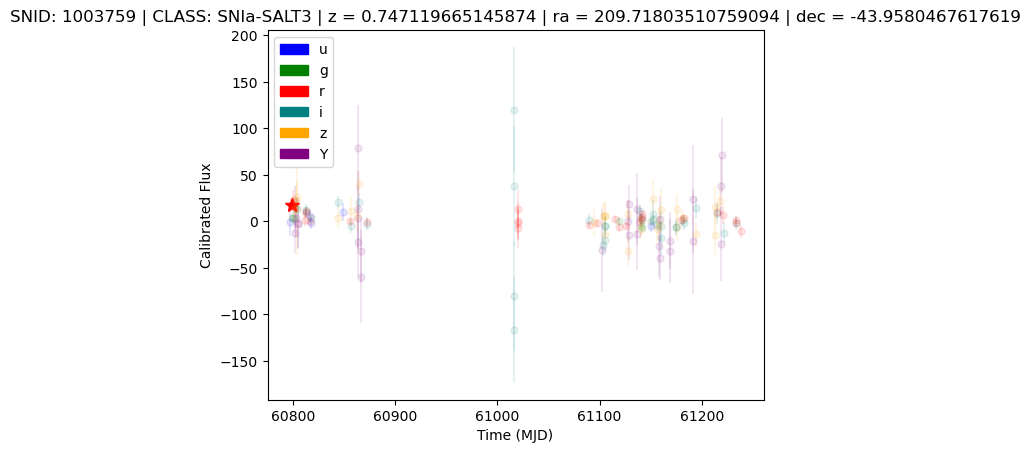

In [15]:
row_source = LSST_Source_with_save(row)
row_source.plot_flux_curve(f'./parquet_LC_{snid}')

In [16]:
# !pip install --user git+https://github.com/uiucsn/Astro-ORACLE.git
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
from collections import OrderedDict
from astroOracle.taxonomy import get_classification_labels, get_astrophysical_class, plot_colored_tree

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from astroOracle.pretrained_models import ORACLE
table = row_source.get_event_table()
table.pprint_all()

scaled_time_since_first_obs detection_flag      scaled_FLUXCAL       scaled_FLUXCALERR   band_label
--------------------------- -------------- ----------------------- --------------------- ----------
                        0.0              0  -0.0009717643260955811   0.01467752170562744       0.36
        0.01894000000000233              1     0.01729065704345703 0.0030573201179504394     0.6215
       0.019178000000028988              0   0.0032749252319335936  0.003966387510299683      0.476
       0.029637999999977183              0    0.003953622579574585  0.006580352783203125      0.476
       0.029875000000029104              0    0.023179792404174806  0.010201996803283691     0.6215
        0.03956899999997404              0    0.013745796203613282  0.013800612449645996       0.87
        0.04863499999999476              0   -0.012059422492980957  0.021695856094360352      1.015
        0.04885999999998603              0    0.014913188934326171   0.02354872512817383      1.015


In [17]:
table

scaled_time_since_first_obs,detection_flag,scaled_FLUXCAL,scaled_FLUXCALERR,band_label
float64,int64,float64,float64,float64
0.0,0,-0.0009717643260955811,0.01467752170562744,0.36
0.01894000000000233,1,0.01729065704345703,0.0030573201179504394,0.6215
0.019178000000028988,0,0.0032749252319335936,0.003966387510299683,0.476
0.029637999999977183,0,0.003953622579574585,0.006580352783203125,0.476
0.029875000000029104,0,0.023179792404174806,0.010201996803283691,0.6215
0.03956899999997404,0,0.013745796203613282,0.013800612449645996,0.87
0.04863499999999476,0,-0.012059422492980957,0.021695856094360352,1.015
0.04885999999998603,0,0.014913188934326171,0.02354872512817383,1.015
0.05696799999997893,0,0.022008249282836914,0.015760520935058593,0.87


In [18]:
from typing import List
from tqdm import tqdm
from astroOracle.dataloader import get_static_features, ts_length, ts_flag_value
from tensorflow.keras.utils import pad_sequences

class nonscaledORACLE(ORACLE):
    def prep_dataframes(self, x_ts_list:List[pd.DataFrame]):

        # Assert that columns names are correct

        augmented_arrays = []

        for ind in tqdm(range(len(x_ts_list)), desc ="TS Processing: "):

            df = x_ts_list[ind]

            # Scale the flux and flux error values
            # df['scaled_FLUXCAL'] = df['FLUXCAL'] / flux_scaling_const
            # df['scaled_FLUXCALERR'] = df['FLUXCALERR']/ flux_scaling_const

            # Subtract off the time of first observation and divide by scale factor
            # df['scaled_time_since_first_obs'] = df['MJD'] / time_scaling_const

            # Remove saturations
            # saturation_mask = np.where((df['PHOTFLAG'] & 1024) == 0)[0]
            # df = df.iloc[saturation_mask].copy()

            # 1 if it was a detection, zero otherwise
            # df.loc[:,'detection_flag'] = np.where((df['PHOTFLAG'] & 4096 != 0), 1, 0)

            # Encode pass band information correctly 
            # df['band_label'] = [pb_wavelengths[pb] for pb in df['BAND']]
            
            # df = df[['scaled_time_since_first_obs', 'detection_flag', 'scaled_FLUXCAL', 'scaled_FLUXCALERR', 'band_label']]
            
            # Truncate array if too long
            arr = df.to_numpy()
            if arr.shape[0]>ts_length:
                arr = arr[:ts_length, :]

            augmented_arrays.append(arr)
            
        augmented_arrays = pad_sequences(augmented_arrays, maxlen=ts_length,  dtype='float32', padding='post', value=ts_flag_value)

        return augmented_arrays

In [19]:
model = nonscaledORACLE()
pred = model.predict([table.to_pandas()], [table.meta])
pred

Model loaded from models/lsst_alpha_0.5/best_model.h5


Static Processing: 100%|██████████| 1/1 [00:00<00:00, 17260.51it/s]


,Alert,Transient,Variable,SN,Fast,Long,Periodic,AGN,SNIa,SNIb/c,...,M-dwarf Flare,SLSN,TDE,ILOT,CART,PISN,Cepheid,RR Lyrae,Delta Scuti,EB
0,1.0,0.997014,0.002985,0.932605,0.000002,0.064407,7.068012e-17,0.002985,0.087236,0.114582,...,2.513612e-28,0.000557,0.00357,0.000903,0.059289,0.000088,1.140467e-31,3.452975e-18,3.650133e-23,6.722711e-17


In [20]:
model.predict_classes([table.to_pandas()], [table.meta])

Static Processing: 100%|██████████| 1/1 [00:00<00:00, 23045.63it/s]


array(['SNII'], dtype='<U13')

In [ ]:
# SNIDs checked: 1025580 (SNIa), 1000168 (SNII), 